In [ ]:
import numpy as np
import pandas as pd
#used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
#to visualize the results
import matplotlib.pyplot as plt
import seaborn
 
#select start date for correlation window as well as list of tickers
start = datetime(2017, 1, 1)
symbols_list = ['MSFT','AAPL','AMZN','GOOG','GOOGL','FB','BRK-B','JNJ','V','PG','JPM','UNH','MA','INTC','VZ','HD','T','PFE','MRK','PEP']

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Adj Close', 'Symbol']]
df.head()

,Date,Adj Close,Symbol
0,2017-01-03,58.969059,MSFT
1,2017-01-04,58.705212,MSFT
2,2017-01-05,58.705212,MSFT
3,2017-01-06,59.214054,MSFT
4,2017-01-09,59.025597,MSFT


In [ ]:
 df_pivot = df.pivot('Date','Symbol','Adj Close').reset_index()
 df_pivot.head()

Symbol,Date,AAPL,AMZN,BRK-B,FB,GOOG,GOOGL,HD,INTC,JNJ,JPM,MA,MRK,MSFT,PEP,PFE,PG,T,UNH,V,VZ
0,2017-01-03,110.193657,753.669983,163.830002,116.860001,786.140015,808.010010,123.412346,33.292320,105.502319,78.289482,103.036858,54.240925,58.969059,94.318771,28.690262,75.275749,34.687389,152.995758,77.675957,46.162464
1,2017-01-04,110.070328,757.179993,164.080002,118.690002,786.900024,807.770020,124.505798,33.119495,105.329285,78.433876,104.014519,54.222885,58.705212,94.499016,28.942392,75.543961,34.485817,153.431671,78.311043,46.111717
2,2017-01-05,110.630081,780.450012,163.300003,120.669998,794.020020,813.020020,123.035622,33.064915,106.431297,77.711906,104.817863,54.204849,58.705212,94.372849,29.220594,76.044609,34.389057,153.687500,79.229477,46.213211
3,2017-01-06,111.863426,795.989990,163.410004,123.410004,806.150024,825.210022,122.695648,33.183170,105.921272,77.720917,105.572250,54.349129,59.214054,94.237633,29.107580,76.017792,33.703892,153.905472,80.323792,45.527649
4,2017-01-09,112.888023,796.919983,162.020004,124.900002,806.650024,827.179993,123.412346,33.301426,105.903038,77.775063,105.366516,55.097591,59.025597,93.246239,29.098885,75.454552,33.279732,153.469559,79.874336,45.031849


In [ ]:
corr_df = df_pivot.corr()
corr_df

Symbol,AAPL,AMZN,BRK-B,FB,GOOG,GOOGL,HD,INTC,JNJ,JPM,MA,MRK,MSFT,PEP,PFE,PG,T,UNH,V,VZ
Symbol,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.879770,0.391030,0.805572,0.914880,0.914805,0.896583,0.796482,0.783850,0.516597,0.856958,0.679571,0.949769,0.797025,0.365451,0.783758,0.169289,0.826174,0.860490,0.713819
AMZN,0.879770,1.000000,0.475828,0.745016,0.895784,0.892642,0.899471,0.820815,0.736146,0.506252,0.879661,0.678075,0.927280,0.698285,0.602253,0.662850,-0.168667,0.897206,0.883826,0.761949
BRK-B,0.391030,0.475828,1.000000,0.389340,0.609630,0.601792,0.593798,0.619370,0.559719,0.920461,0.650177,0.538093,0.461906,0.486463,0.747455,0.397292,0.134931,0.672570,0.649878,0.679413
FB,0.805572,0.745016,0.389340,1.000000,0.845138,0.847198,0.836710,0.708401,0.650583,0.547037,0.745661,0.461639,0.771137,0.679616,0.259190,0.607846,0.144736,0.695655,0.748890,0.504781
GOOG,0.914880,0.895784,0.609630,0.845138,1.000000,0.999523,0.948065,0.897462,0.804238,0.711706,0.919051,0.705672,0.924557,0.800894,0.525514,0.739822,0.114012,0.900542,0.922951,0.781682
GOOGL,0.914805,0.892642,0.601792,0.847198,0.999523,1.000000,0.944091,0.890148,0.801895,0.704942,0.911224,0.698030,0.919096,0.794321,0.520724,0.732240,0.111368,0.897290,0.915369,0.772266
HD,0.896583,0.899471,0.593798,0.836710,0.948065,0.944091,1.000000,0.854544,0.754485,0.690891,0.941672,0.745404,0.934051,0.844406,0.524243,0.792754,0.167513,0.859156,0.946098,0.819271
INTC,0.796482,0.820815,0.619370,0.708401,0.897462,0.890148,0.854544,1.000000,0.703484,0.721416,0.883220,0.669667,0.861429,0.693634,0.535865,0.655362,0.052592,0.871042,0.881506,0.779784
JNJ,0.783850,0.736146,0.559719,0.650583,0.804238,0.801895,0.754485,0.703484,1.000000,0.535702,0.764168,0.674666,0.803353,0.782920,0.603718,0.713399,0.016240,0.816044,0.780806,0.732666


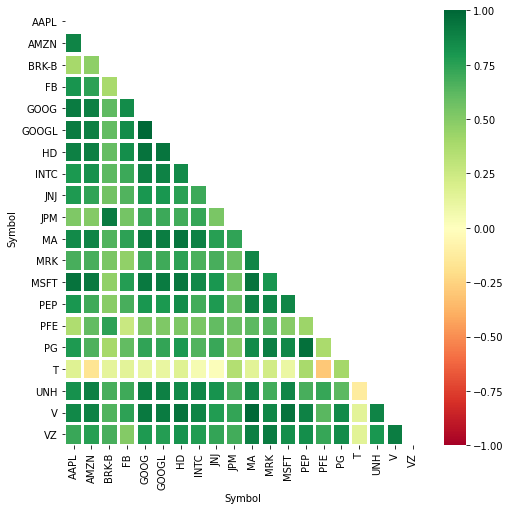

In [ ]:
 #heatmap for better visualization
 mask = np.zeros_like(corr_df)
 mask[np.triu_indices_from(mask)] = True
 #generate plot
 plt.figure(figsize=(8,8))
 seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 ,mask = mask, linewidths=2.5)
 plt.yticks(rotation=0) 
 plt.xticks(rotation=90) 
 plt.show()

In [ ]:
i=0
j=0
sum = [0]*20
best_st_2 = [0]*20
for i in range(20):
  for j in range(20):
    sum[i] = sum[i]+corr_df.iloc[i,j]
  if(sum[i]<14.2): #the threshold will have to be adjusted if number of stocks change. 
    best_st_2.append(corr_df.index.values[i])
best_st_2copy = best_st_2
count=0
for k in range(len(best_st_2)):
  if(k<=(len(best_st_2)-1)):
    if(best_st_2[k]!=0):
      for t in range(len(best_st_2)):
        if(t!=(len(best_st_2)-1)):
          if(best_st_2[t]!=0):
            if(corr_df.loc[best_st_2[k],best_st_2[t]]>0.7):
              if(count==0):
                del best_st_2copy[k]
                count=count+1
                break
print(sum)
print(best_st_2copy)
#answer - AT & T, PFE, JNJ, JPM, FB.

[14.901875644659622, 14.674440586608874, 11.579145318906265, 12.994147483945873, 15.96112166338323, 15.86896460604431, 15.993205647343503, 14.896220954343802, 14.018081563468574, 12.88382482255587, 16.40807219373149, 14.250715803258466, 15.885009381251363, 14.987304587735151, 10.609550336550514, 14.290430627577155, 3.2569024651606533, 15.125920758264902, 16.453139845300846, 15.180266299572551]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'FB', 'JNJ', 'JPM', 'PFE', 'T']
